In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

1. Write a Pandas program to detect missing values of a given DataFrame.
Display True or False.

In [7]:
data = """ord_no purch_amt ord_date customer_id salesman_id
0 70001.0 150.50 2012-10-05 3002 5002.0
1 NaN 270.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN 3001 5001.0
3 70004.0 110.50 2012-08-17 3003 NaN
4 NaN 948.50 2012-09-10 3002 5002.0
5 70005.0 2400.60 2012-07-27 3001 5001.0
6 NaN 5760.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 2012-10-10 3004 NaN
8 70003.0 2480.40 2012-10-10 3003 5003.0
9 70012.0 250.45 2012-06-27 3002 5002.0
10 NaN 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')
df

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,NaN,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,NaN
4,NaN,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,NaN,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,NaN
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


In [8]:
df.isna()

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,True
4,True,False,False,False,False
5,False,False,False,False,False
6,True,False,False,False,False
7,False,False,False,False,True
8,False,False,False,False,False
9,False,False,False,False,False


2. Write a Pandas program to identify the column(s) of a given DataFrame which
have at least one missing value.

In [9]:
for column in df.columns:
  if df[column].isna().any():
    print(column)

ord_no
ord_date
salesman_id


3. Write a Pandas program to count the number of missing values in each
column of a given DataFrame.

In [10]:
df.isna().sum()

,0
ord_no,4
purch_amt,0
ord_date,1
customer_id,0
salesman_id,3


4. Write a Pandas program to find and replace the missing values in a given
DataFrame which do not have any valuable information.

In [11]:
new_ord_no = [x + 80000 for x in range(1, len(df) + 1)]

for i, value in enumerate(df['ord_no']):
    if pd.isna(value):
        df.at[i, 'ord_no'] = new_ord_no[i]

new_salesman_id = [x + 6000 for x in range(1, len(df) + 1)]

for i, value in enumerate(df['salesman_id']):
    if pd.isna(value):
        df.at[i, 'salesman_id'] = new_salesman_id[i]

df

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,80002.0,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,6004.0
4,80005.0,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,80007.0,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,6008.0
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


In [13]:


df['ord_date'] = pd.to_datetime(df['ord_date'])

df

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,80002.0,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaT,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,6004.0
4,80005.0,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,80007.0,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,6008.0
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


5. Write a Pandas program to drop the rows where at least one element is
missing in a given DataFrame.

In [14]:
df_cleaned = df.dropna()
df_cleaned

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,80002.0,270.65,2012-09-10,3001,5003.0
3,70004.0,110.50,2012-08-17,3003,6004.0
4,80005.0,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,80007.0,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,6008.0
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0
10,80011.0,75.29,2012-08-17,3001,5003.0


7. Write a Pandas program to drop the rows where all elements are missing in a
given DataFrame.

In [15]:
import io

data = """ord_no purch_amt ord_date customer_id
0 NaN NaN NaN NaN
1 NaN 270.65 2012-09-10 3001.0
2 70002.0 65.26 NaN 3001.0
3 70004.0 110.50 2012-08-17 3003.0
4 NaN 948.50 2012-09-10 3002.0
5 70005.0 2400.60 2012-07-27 3001.0
6 NaN 5760.00 2012-09-10 3001.0
7 70010.0 1983.43 2012-10-10 3004.0
8 70003.0 2480.40 2012-10-10 3003.0
9 70012.0 250.45 2012-06-27 3002.0
10 NaN 75.29 2012-08-17 3001.0
11 70013.0 3045.60 2012-04-25 3001.0"""

df = pd.read_csv(io.StringIO(data), sep=' ')
df

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,NaN,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,70004.0,110.50,2012-08-17,3003.0
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


In [16]:
df.dropna(how='all', inplace=True)
df

,ord_no,purch_amt,ord_date,customer_id
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,70004.0,110.50,2012-08-17,3003.0
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0
10,NaN,75.29,2012-08-17,3001.0


8. Write a Pandas program to keep the rows with at least 2 NaN values in a given
DataFrame.

In [17]:
data = """ord_no purch_amt ord_date customer_id
0 NaN NaN NaN NaN
1 NaN 270.65 2012-09-10 3001.0
2 70002.0 65.26 NaN 3001.0
3 NaN NaN NaN NaN
4 NaN 948.50 2012-09-10 3002.0
5 70005.0 2400.60 2012-07-27 3001.0
6 NaN 5760.00 2012-09-10 3001.0
7 70010.0 1983.43 2012-10-10 3004.0
8 70003.0 2480.40 2012-10-10 3003.0
9 70012.0 250.45 2012-06-27 3002.0
10 NaN 75.29 2012-08-17 3001.0
11 NaN NaN NaN NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')
df

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,NaN,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,NaN,NaN,NaN,NaN
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


In [18]:
df = df.dropna(thresh=2)
df

,ord_no,purch_amt,ord_date,customer_id
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0
10,NaN,75.29,2012-08-17,3001.0


9. Write a Pandas program to drop those rows from a given DataFrame in which
specific columns have missing values.

In [19]:
data = """ord_no purch_amt ord_date customer_id
0 NaN NaN NaN NaN
1 NaN 270.65 2012-09-10 3001.0
2 70002.0 65.26 NaN 3001.0
3 NaN NaN NaN NaN
4 NaN 948.50 2012-09-10 3002.0
5 70005.0 2400.60 2012-07-27 3001.0
6 NaN 5760.00 2012-09-10 3001.0
7 70010.0 1983.43 2012-10-10 3004.0
8 70003.0 2480.40 2012-10-10 3003.0
9 70012.0 250.45 2012-06-27 3002.0
10 NaN 75.29 2012-08-17 3001.0
11 NaN NaN NaN NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')
df

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,NaN,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,NaN,3001.0
3,NaN,NaN,NaN,NaN
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


In [20]:
df = df.dropna(subset=['ord_date', 'customer_id'])
df

,ord_no,purch_amt,ord_date,customer_id
1,NaN,270.65,2012-09-10,3001.0
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0
10,NaN,75.29,2012-08-17,3001.0


10. Write a Pandas program to keep the valid entries of a given DataFrame.

In [21]:
data = """ord_no purch_amt ord_date customer_id
0 NaN NaN NaN NaN
1 NaN 270.65 2012-09-10 3001.0
2 70002.0 65.26 NaN 3001.0
3 NaN NaN NaN NaN
4 NaN 948.50 2012-09-10 3002.0
5 70005.0 2400.60 2012-07-27 3001.0
6 NaN 5760.00 2012-09-10 3001.0
7 70010.0 1983.43 2012-10-10 3004.0
8 70003.0 2480.40 2012-10-10 3003.0
9 70012.0 250.45 2012-06-27 3002.0
10 NaN 75.29 2012-08-17 3001.0
11 NaN NaN NaN NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df = df.dropna()
df

,ord_no,purch_amt,ord_date,customer_id
5,70005.0,2400.60,2012-07-27,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


11. Write a Pandas program to calculate the total number of missing values in a
DataFrame.

In [22]:
data = """ord_no purch_amt ord_date customer_id
0 NaN NaN NaN NaN
1 NaN 270.65 2012-09-10 3001.0
2 70002.0 65.26 NaN 3001.0
3 NaN NaN NaN NaN
4 NaN 948.50 2012-09-10 3002.0
5 70005.0 2400.60 2012-07-27 3001.0
6 NaN 5760.00 2012-09-10 3001.0
7 70010.0 1983.43 2012-10-10 3004.0
8 70003.0 2480.40 2012-10-10 3003.0
9 70012.0 250.45 2012-06-27 3002.0
10 NaN 75.29 2012-08-17 3001.0
11 NaN NaN NaN NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df.isnull().sum().sum()

np.int64(17)

12. Write a Pandas program to replace NaNs with a single constant value in
specified columns in a DataFrame.

In [23]:
data = """ord_no purch_amt ord_date customer_id
0 NaN NaN NaN NaN
1 NaN 270.65 2012-09-10 3001.0
2 70002.0 65.26 NaN 3001.0
3 NaN NaN NaN NaN
4 NaN 948.50 2012-09-10 3002.0
5 70005.0 2400.60 2012-07-27 3001.0
6 NaN 5760.00 2012-09-10 3001.0
7 70010.0 1983.43 2012-10-10 3004.0
8 70003.0 2480.40 2012-10-10 3003.0
9 70012.0 250.45 2012-06-27 3002.0
10 NaN 75.29 2012-08-17 3001.0
11 NaN NaN NaN NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df['customer_id'] = df['customer_id'].fillna(df['customer_id'].mean())
df['purch_amt'] = df['purch_amt'].fillna(df['purch_amt'].mean())
df['ord_no'] = df['ord_no'].fillna(df['ord_no'].mean())
df['ord_date'] = df['ord_date'].fillna("----")

df

,ord_no,purch_amt,ord_date,customer_id
0,70006.4,1581.62,----,3001.777778
1,70006.4,270.65,2012-09-10,3001.000000
2,70002.0,65.26,----,3001.000000
3,70006.4,1581.62,----,3001.777778
4,70006.4,948.50,2012-09-10,3002.000000
5,70005.0,2400.60,2012-07-27,3001.000000
6,70006.4,5760.00,2012-09-10,3001.000000
7,70010.0,1983.43,2012-10-10,3004.000000
8,70003.0,2480.40,2012-10-10,3003.000000
9,70012.0,250.45,2012-06-27,3002.000000


13. Write a Pandas program to replace NaNs with the value from the previous
row or the next row in a given DataFrame.

In [24]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df['sale_amt'] = df['sale_amt'].fillna(method='ffill')
df['ord_date'] = df['ord_date'].fillna(method='bfill')
df['ord_no'] = df['ord_no'].fillna(method='ffill')
df['customer_id'] = df['customer_id'].fillna(method='bfill')
df['salesman_id'] = df['salesman_id'].fillna(method='ffill')
df['purch_amt'] = df['purch_amt'].fillna(method='bfill')

df

<ipython-input-24-fff854aa0a57>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['sale_amt'] = df['sale_amt'].fillna(method='ffill')
<ipython-input-24-fff854aa0a57>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ord_date'] = df['ord_date'].fillna(method='bfill')
<ipython-input-24-fff854aa0a57>:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ord_no'] = df['ord_no'].fillna(method='ffill')
<ipython-input-24-fff854aa0a57>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['customer_id'] = df['customer_id'].fillna(method='bfill')
<ipython-input-24-fff854aa0a57>:21: FutureWarning: Series.fillna with 'method' is deprecated a

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,65.26,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,20.65,2012-08-17,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5001.0
4,70004.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,5760.00,98.50,2012-07-27,3001,5001.0
6,70005.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5001.0
8,70003.0,250.45,19.43,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


14. Write a Pandas program to replace NaNs with median or mean of the
specified columns in a given DataFrame.

In [27]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

print("mean : ", df['sale_amt'].mean())
print("median : ", df['purch_amt'].median())

df['sale_amt'] = df['sale_amt'].fillna(df['sale_amt'].mean())
df['purch_amt'] = df['purch_amt'].fillna(df['purch_amt'].median())
df

mean :  39.324444444444445
median :  250.45


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500000,2012-10-05,3002,5002.0
1,NaN,250.45,20.650000,2012-09-10,3001,5003.0
2,70002.0,65.26,39.324444,NaN,3001,5001.0
3,70004.0,110.50,11.500000,2012-08-17,3003,NaN
4,NaN,948.50,98.500000,2012-09-10,3002,5002.0
5,70005.0,250.45,39.324444,2012-07-27,3001,5001.0
6,NaN,5760.00,57.000000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430000,2012-10-10,3004,NaN
8,70003.0,250.45,39.324444,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450000,2012-06-27,3002,5002.0


15. Write a Pandas program to interpolate the missing values using the Linear
Interpolation method in a given DataFrame.
From Wikipedia, in mathematics, linear interpolation is a method of curve fitting
using linear polynomials to construct new

In [28]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df['sale_amt'] = df['sale_amt'].interpolate(method='linear')
df['purch_amt'] = df['purch_amt'].interpolate(method='linear')
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,NaN,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,NaN,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,NaN
4,NaN,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,NaN,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,NaN
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


16. Write a Pandas program to count the number of missing values of a specified
column in a given DataFrame.

In [33]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df['purch_amt'].isnull().sum()

np.int64(3)

17. Write a Pandas program to count the missing values in a given DataFrame.

In [34]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df.isnull().sum().sum()

np.int64(14)

18. Write a Pandas program to find the Indexes of missing values in a given
DataFrame.

In [36]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

missing_indexes = df[df.isnull().any(axis=1)].index
missing_indexes

Index([1, 2, 3, 4, 5, 6, 7, 8, 10, 11], dtype='int64')

19. Write a Pandas program to replace the missing values with the most frequent
values present in each column of a given DataFrame.

In [39]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

df['purch_amt'] = df['purch_amt'].fillna(df['purch_amt'].mode()[0])
df['sale_amt'] = df['sale_amt'].fillna(df['sale_amt'].mode()[0])
df['ord_date'] = df['ord_date'].fillna(df['ord_date'].mode()[0])
df['customer_id'] = df['customer_id'].fillna(df['customer_id'].mode()[0])
df['salesman_id'] = df['salesman_id'].fillna(df['salesman_id'].mode()[0])
df['ord_no'] = df['ord_no'].fillna(df['ord_no'].mode()[0])
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,65.26,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5001.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,65.26,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5001.0
8,70003.0,65.26,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


20. Write a Pandas program to create a hitmap for more information about the
distribution of missing values in a given DataFrame.

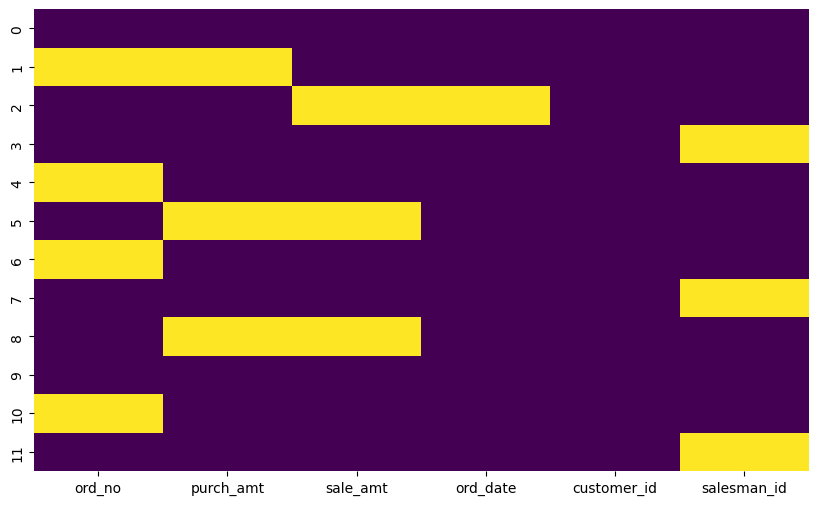

In [41]:
data = """ord_no purch_amt sale_amt ord_date customer_id salesman_id
0 70001.0 150.50 10.50 2012-10-05 3002 5002.0
1 NaN NaN 20.65 2012-09-10 3001 5003.0
2 70002.0 65.26 NaN NaN 3001 5001.0
3 70004.0 110.50 11.50 2012-08-17 3003 NaN
4 NaN 948.50 98.50 2012-09-10 3002 5002.0
5 70005.0 NaN NaN 2012-07-27 3001 5001.0
6 NaN 5760.00 57.00 2012-09-10 3001 5001.0
7 70010.0 1983.43 19.43 2012-10-10 3004 NaN
8 70003.0 NaN NaN 2012-10-10 3003 5003.0
9 70012.0 250.45 25.45 2012-06-27 3002 5002.0
10 NaN 75.29 75.29 2012-08-17 3001 5003.0
11 70013.0 3045.60 35.60 2012-04-25 3001 NaN"""

df = pd.read_csv(io.StringIO(data), sep=' ')

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()